In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt



In [36]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df = titanic_df.drop(columns=['Unnamed: 0', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
imputer = SimpleImputer(strategy='mean')
titanic_df['Age'] = imputer.fit_transform(titanic_df[['Age']])
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'].fillna('S'))
x = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

[0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 0 0 0 0 0 0]
Accuracy: 0.7052238805970149
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77       157
           1       0.69      0.53      0.60       111

    accuracy                           0.71       268
   macro avg       0.70      0.68      0.68       268
weighted avg       0.70      0.71      0.70       268

Confusion Matrix:
 [[130  27]
 [ 52  59]]
Misclassification Rate: 0.2947761

[Text(0, 0.5, 'Predicted(1)'), Text(0, 1.5, 'Predicted(0)')]

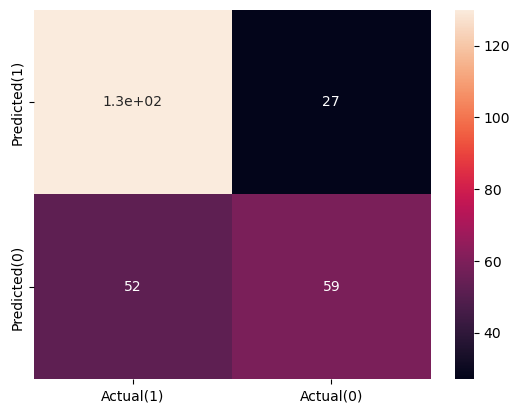

In [38]:
#iteration 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(labels=['Actual(1)','Actual(0)'])
ax.yaxis.set_ticklabels(labels=['Predicted(1)','Predicted(0)'])

[0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 0 0 0 0 0 0]
Accuracy: 0.7052238805970149
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77       157
           1       0.69      0.53      0.60       111

    accuracy                           0.71       268
   macro avg       0.70      0.68      0.68       268
weighted avg       0.70      0.71      0.70       268

Confusion Matrix:
 [[130  27]
 [ 52  59]]
Misclassification Rate: 0.2947761

[Text(0, 0.5, 'Predicted(1)'), Text(0, 1.5, 'Predicted(0)')]

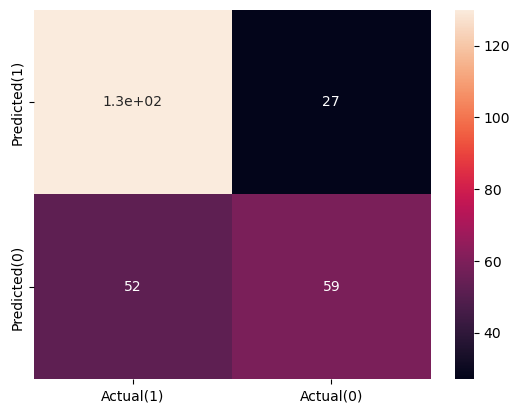

In [40]:
#iteration 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(labels=['Actual(1)','Actual(0)'])
ax.yaxis.set_ticklabels(labels=['Predicted(1)','Predicted(0)'])

[1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0
 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1]
Accuracy: 0.711484593837535
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77       221
           1       0.63      0.57      0.60       136

    accuracy                           0.71       357
   ma

[Text(0, 0.5, 'Predicted(1)'), Text(0, 1.5, 'Predicted(0)')]

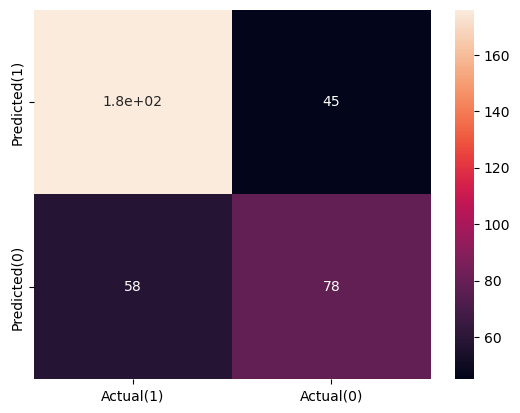

In [44]:
#iteration 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(labels=['Actual(1)','Actual(0)'])
ax.yaxis.set_ticklabels(labels=['Predicted(1)','Predicted(0)'])

[0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1]
Accuracy: 0.7058823529411765
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       216
           1       0.65      0.55      0.60       141

    accuracy                           0.71       357
   m

[Text(0, 0.5, 'Predicted(1)'), Text(0, 1.5, 'Predicted(0)')]

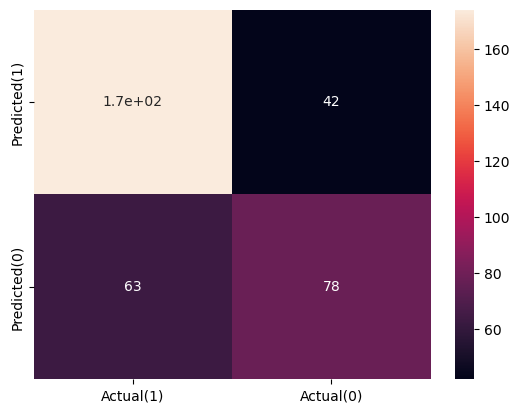

In [46]:
#iteration 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(labels=['Actual(1)','Actual(0)'])
ax.yaxis.set_ticklabels(labels=['Predicted(1)','Predicted(0)'])

[1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1
 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1
 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0]
Accuracy: 0.6659192825112108
Classification Report:
               precision    recall  f1-sco

[Text(0, 0.5, 'Predicted(1)'), Text(0, 1.5, 'Predicted(0)')]

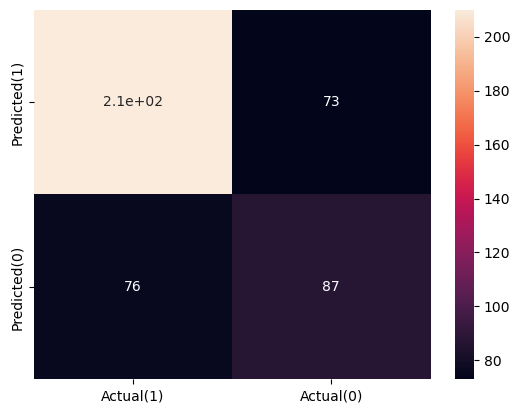

In [48]:
#iteration 3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(labels=['Actual(1)','Actual(0)'])
ax.yaxis.set_ticklabels(labels=['Predicted(1)','Predicted(0)'])

[0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1
 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0]
Accuracy: 0.6659192825112108
Classification Report:
               precision    recall  f1-sco

[Text(0, 0.5, 'Predicted(1)'), Text(0, 1.5, 'Predicted(0)')]

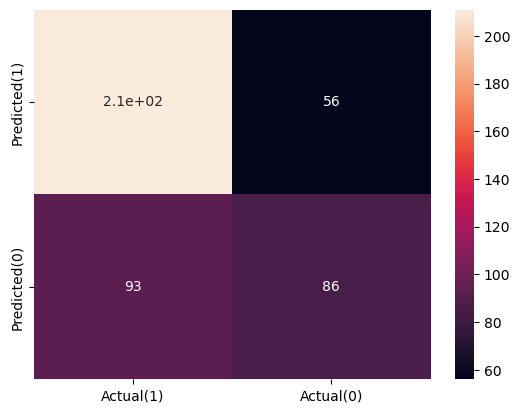

In [50]:
#iteration 3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(labels=['Actual(1)','Actual(0)'])
ax.yaxis.set_ticklabels(labels=['Predicted(1)','Predicted(0)'])